<a href="https://colab.research.google.com/github/Lucca465/machine_learning_discover_income/blob/main/machine_learning_discover_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este projeto tem como objetivo carregar a base de dados Census, realizar a análise exploratória, posteriormente fazer a limpeza dos dados e desenvolver um algoritmo de Redes Neurais para prever se a renda de uma pessoa ultrapassa 50 mil dólares por ano.

Esse estudo pode ser utilizado por instituições financeiras para auxiliar na tomada de decisão, ajudando a definir a quantidade de crédito a ser concedida a um indivíduo com base em sua renda estimada.

# Configuração inicial

**Importação das bibliotecas**

Para a análise e visualização dos dados, utilizamos as seguintes bibliotecas:

In [1]:
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações numéricas e tratamento de dados
import seaborn as sns  # Visualização de dados estatísticos
import matplotlib.pyplot as plt  # Criação de gráficos estáticos
import plotly.express as px  # Visualizações interativas

Cada uma dessas bibliotecas desempenha um papel fundamental na exploração e análise dos dados, permitindo desde a manipulação eficiente até a geração de visualizações dinâmicas e estatísticas.

**Carregamento da Base de Dados**

Para importar os dados, utilizamos a biblioteca pandas, que permite manipular e analisar conjuntos de dados de forma eficiente. O arquivo census.csv é carregado da seguinte maneira:

In [2]:
url = 'https://raw.githubusercontent.com/Lucca465/machine_learning_discover_income/refs/heads/main/database/census.csv'
census = pd.read_csv(url)
census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

Após esse processo, a base de dados estará disponível na variável census, possibilitando a exploração e análise dos dados.

# Análise inicial

**Análise da Base de Dados Carregada**

Após o carregamento da base de dados, podemos visualizar seu conteúdo executando o seguinte comando:

In [ ]:
census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

Esse comando exibirá a tabela completa, mas para uma análise inicial mais eficiente, podemos utilizar algumas funções do pandas:

In [ ]:
# Exibir informações gerais sobre o dataset, como tipos de dados e valores nulos
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Em nossa base de dados, não há registros com valores nulos.

Podemos analisar posteriormente quais valores disponíveis para cada coluna com o dtype igual a object.

In [ ]:
# Resumo estatístico das variáveis numéricas
census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

Podemos examinar os valores distintos presentes em cada coluna do tipo string. Para isso, selecionamos as colunas com o tipo de dado 'object' e aplicamos o método unique em cada uma delas.

In [ ]:
unique_values_per_column = {}

for column in census.columns:
  if(census[column].dtype == 'object'):
    unique_values_per_column[column] = census[column].unique()

for column, unique_values in unique_values_per_column.items():
  print(f"Valores únicos para a coluna '{column}':")
  for value in unique_values:
    print(f"- {value}")
  print("\n")

Valores únicos para a coluna 'workclass':
-  State-gov
-  Self-emp-not-inc
-  Private
-  Federal-gov
-  Local-gov
-  ?
-  Self-emp-inc
-  Without-pay
-  Never-worked


Valores únicos para a coluna 'education':
-  Bachelors
-  HS-grad
-  11th
-  Masters
-  9th
-  Some-college
-  Assoc-acdm
-  Assoc-voc
-  7th-8th
-  Doctorate
-  Prof-school
-  5th-6th
-  10th
-  1st-4th
-  Preschool
-  12th


Valores únicos para a coluna 'marital-status':
-  Never-married
-  Married-civ-spouse
-  Divorced
-  Married-spouse-absent
-  Separated
-  Married-AF-spouse
-  Widowed


Valores únicos para a coluna 'occupation':
-  Adm-clerical
-  Exec-managerial
-  Handlers-cleaners
-  Prof-specialty
-  Other-service
-  Sales
-  Craft-repair
-  Transport-moving
-  Farming-fishing
-  Machine-op-inspct
-  Tech-support
-  ?
-  Protective-serv
-  Armed-Forces
-  Priv-house-serv


Valores únicos para a coluna 'relationship':
-  Not-in-family
-  Husband
-  Wife
-  Own-child
-  Unmarried
-  Other-relative


Valores únic

# Visualização dos dados

Verificamos que a variável classe da nossa base de dados contém 2 valores, vamos verificar a quantidade de registros que cada valor tem.

In [ ]:
np.unique(census.income, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

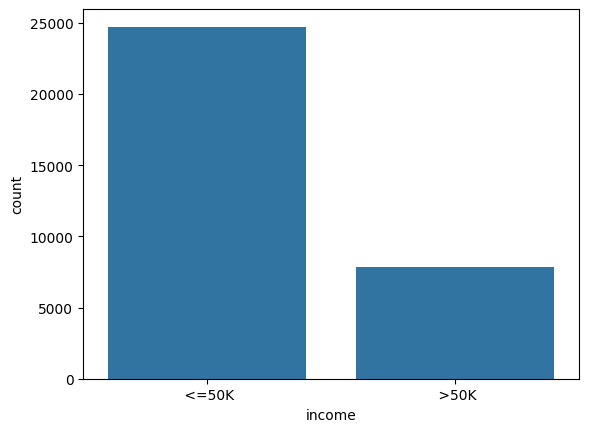

In [ ]:
sns.countplot(x=census.income)

A maior parte da nossa base possui uma renda inferior a 50 mil, tornando uma base de dados desbalanceada.

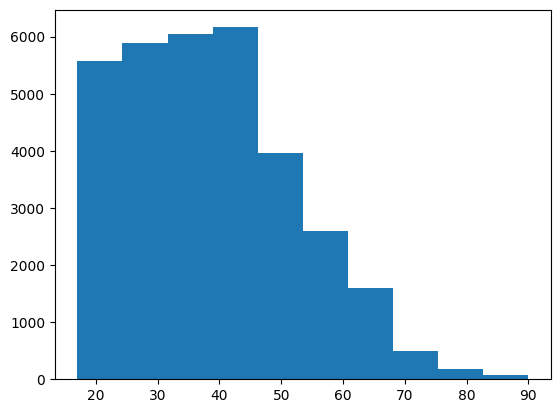

In [ ]:
plt.hist(x = census.age);

O histograma acima nos permite observar claramente que a maior parte da nossa base de dados é composta por indivíduos com idades entre 20 e 45 anos.

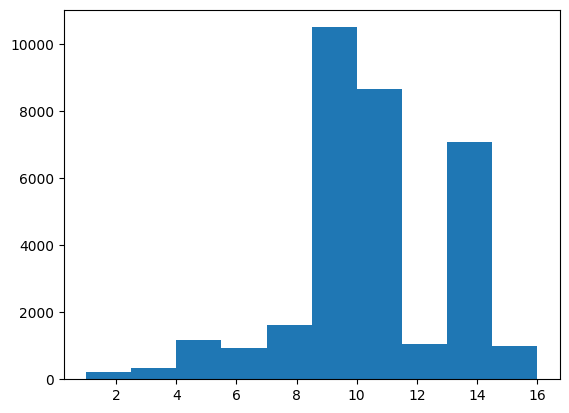

In [ ]:
plt.hist(x = census['education-num']);

O número de pessoa nessa base de dados estuda entre 9 a 11 anos. E com um pico com 14 anos.

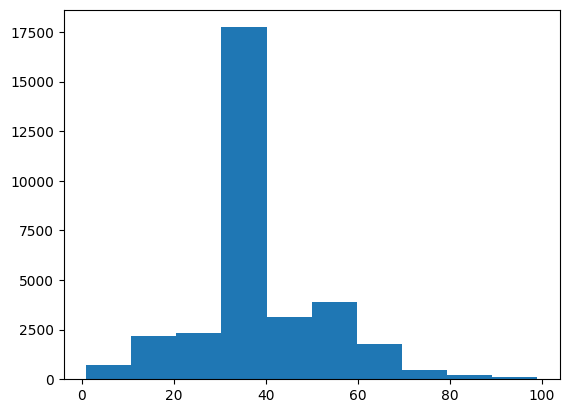

In [ ]:
plt.hist(x = census['hour-per-week']);

A grande maioria das pessoa nessa base, trabalha entre 30 a 40 horas semanais

Abaixo, vamos conhecer o Treemap, capaz de entender a diferença de tamanho entre cada variável.

In [ ]:
# No github não aparece o gráfico, então ele irá ser anexado na branch main ou vc poderá acessar clicando no link do Google Colab
grafico = px.treemap(census, path=['workclass', 'age'])
grafico.show()

In [ ]:
# No github não aparece o gráfico, então ele irá ser anexado na branch main ou vc poderá acessar clicando no link do Google Colab
grafico = px.treemap(census, path=['occupation', 'relationship', 'age'])
grafico.show()

O próximo grafico é o parallel categories, nele podemos analisar a relação de cada variável e o quanto influencia o crescimento da outra.

In [ ]:
# No github não aparece o gráfico, então ele irá ser anexado na branch main ou vc poderá acessar clicando no link do Google Colab
grafico = px.parallel_categories(census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
# No github não aparece o gráfico, então ele irá ser anexado na branch main ou vc poderá acessar clicando no link do Google Colab
grafico = px.parallel_categories(census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [ ]:
# No github não aparece o gráfico, então ele irá ser anexado na branch main ou vc poderá acessar clicando no link do Google Colab
grafico = px.parallel_categories(census, dimensions=['education', 'income'])
grafico.show()

# Divisão entre previsores e classe

Para treinar um modelo de aprendizado de máquina, é importante definir quais serão as variáveis independentes (previsores) e a variável dependente (classe).

* Variáveis de Previsores (X): são as colunas que utilizaremos para fazer a previsão. No nosso caso são 14 colunas.
* Variável de Classe (Y): é a coluna que contém o valor que queremos prever, ou seja, income, que indica se a pessoa ganha mais ou menos que 50 mil por ano.

In [ ]:
census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X_census = census.iloc[:, 0:14].values

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
y_census = census.iloc[:, 14].values

In [ ]:
y_census[0]

' <=50K'

# Tratamentos de atributos categórico

Nossa base de dados contém variáveis categóricas, e para que os algoritmos de machine learning possam realizar previsões de forma eficaz, é necessário realizar os seguintes tratamentos:

## **LabelEncoder**

O Primeiro tratamento é o Label Encoder, esse tratamento permite colocar para cada valor disponível em uma variável um número, exemplo de como a variável 'workclass' irá ficar:

-  0 = State-gov
-  1 = Self-emp-not-inc
-  2 = Private
-  3 = Federal-gov
-  4 = Local-gov
-  5 = ?
-  6 = Self-emp-inc
-  7 = Without-pay
-  8 = Never-worked



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

## **OneHotEncoder**

Agora vamos utilizar o OneHotEncoder, essa técnica utiliza o resultado do LabelEncoder e cria uma nova coluna para cada categoria da variável original e representa cada linha com um vetor binário. Cada vetor tem valor 1 para a categoria presente e 0 para as ausentes. O objetivo dessa técnica serve para não deixar que o algoritmo de machine learning achar que o maior valor é o mais importante. Exemplo para a variável 'workclass' como irá ficar:

In [ ]:
census.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

A variável Workclass contém 9 valores disponíveis na base de dados. Então o OnehotEncoder irá criar uma 9 colunas a mais na base de dados. O valor Private por exemplo irá ficar:

| 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |

Como ele é o terceiro valor da nossa lista, ele atribuiu o valor 1 na terceira coluna de Workclass.






In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape

(32561, 108)

Podemos perceber que a nossa base agora tem 108 colunas, por causa do OneHotEncoder aplicado a cada variável categórico.

## **Escalonamento dos valores**

O escalonamento dos dados é uma etapa crucial no pré-processamento, pois muitos algoritmos de aprendizado de máquina são sensíveis à escala das variáveis. Se as variáveis não tiverem a mesma escala, o algoritmo pode atribuir mais importância a uma variável com valores mais altos, como é o caso da variável final-weight, que tende a ser maior do que a variável age. Para garantir que todas as variáveis sejam tratadas de forma igual, é necessário realizar o escalonamento.

Existem duas técnicas principais para escalonamento:

**Padronização (Z-Score):**
A fórmula é:

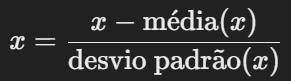



A padronização transforma os dados para que tenham média igual a 0 e desvio padrão igual a 1. É recomendada quando não há muitos outliers na base de dados, como é o caso da nossa.

**Normalização (Min-Max Scaling):**
A fórmula é:

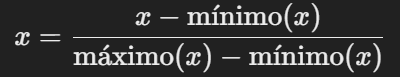

A normalização ajusta os valores para o intervalo [0, 1]. Este método é mais indicado quando a base de dados contém muitos outliers (valores discrepantes).

Como nossa base não contém muitos valores discrepantes, vamos utilizar padronização para escalonar as variáveis idade e salário.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão das bases em treinamento e teste

Uma etapa essencial no desenvolvimento de modelos de aprendizado de máquina é dividir a base de dados em dois subconjuntos: um para treinamento e outro para teste. A divisão permite que o modelo aprenda com uma parte dos dados (treinamento) e seja avaliado com outra parte que não foi utilizada no processo de treinamento (teste).

No nosso caso, vamos seguir com a estratégia de 15% da base vai ficar para teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_census_train, X_census_test, y_census_train, y_census_test = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [ ]:
X_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [ ]:
X_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

# Redes neurais artificiais

Para fazer a previsão da nossa base de dados de classificação, vamos utilizar o algoritmo de redes neurais, uma poderosa técnica de aprendizado de máquina que simula o funcionamento do cérebro humano para reconhecer padrões e fazer previsões.

In [ ]:
from sklearn.neural_network import MLPClassifier

Vamos usar o MLPClassifier do scikit-learn para construir e treinar uma rede neural com o objetivo de fazer previsões para nossa base de dados de classificação. O MLPClassifier implementa o algoritmo Multi-Layer Perceptron (MLP), que é uma rede neural de múltiplas camadas, e é muito eficiente para tarefas de classificação.

O MLPClassifier será configurado com os seguintes parâmetros:

* max_iter=1000: O número máximo de iterações (épocas) para o treinamento.
* verbose=True: Exibe o progresso do treinamento, ajudando a monitorar o processo. (Retirado para deixar o notebook mais limpo)
* tol=0.000010: O critério de tolerância para a melhoria do erro. Se a melhoria for menor que esse valor, o treinamento será interrompido.
* hidden_layer_sizes=(50,50): A rede terá duas camadas ocultas, cada uma com 50 neurônios.

In [ ]:
rede_neural_census = MLPClassifier(max_iter=1000, tol=0.000010,
                                   hidden_layer_sizes=(50,50))
rede_neural_census.fit(X_census_train, y_census_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, tol=1e-05)

Rodando as redes neurais podemos usar o predict para fazer as precisões do dados.

OBS: pode ter pequenas diferenças a cada vez que rodamos o camando da redes neurais|

In [ ]:
previsoes = rede_neural_census.predict(X_census_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

Com as previsões feitas, vamos fazer o comparativo dos resultados que as redes neurais geraram com aquele 25% dos registros que separamos anteriormente.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_test, previsoes)

0.8223132036847492

Com os parâmetros que utilizamos no nosso algoritmo, chegamos a uma taxa de acerto de 82% dos resultados.

0.8223132036847492

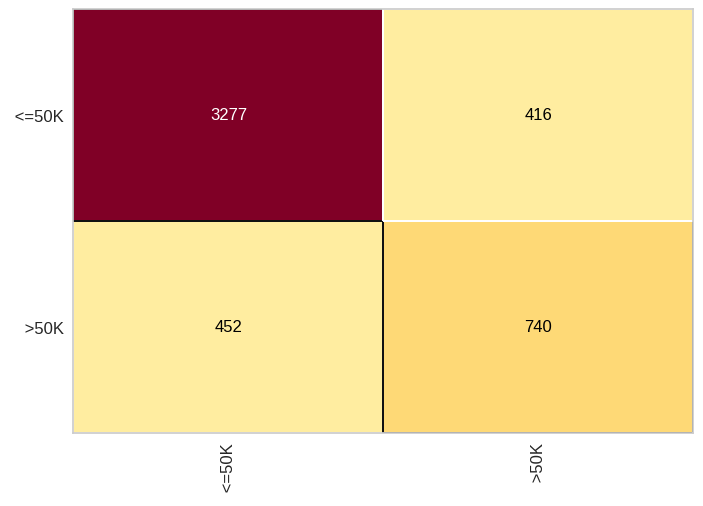

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

A rede neural acertou que 3277 pessoas ganham menos que 50 mil e errou 416 pessoas classificando erroneamente que ganha mais que 50 mil.
Também acertou 740 pessoas ganham acima de 50 mil e errou 452 pessoas classificando erroneamento que ganham abaixo de 50 mil.

In [ ]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      3693
        >50K       0.64      0.62      0.63      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.75      0.76      4885
weighted avg       0.82      0.82      0.82      4885



O algoritmo teve uma precisão de 88% para classificar pessoas com renda menor que 50 mil. E teve uma precisão de 64% para classificar pessoas com renda maior que 50 mil.